# HW1: Causal Inference
## Mahdi Sabbaghi(95109123)

## Poblem 1:
At this part I used rnorm to generate standard normal the samples. for ploting the conditional distributions I've used three different x and for every x I generate 1000 samples of y.

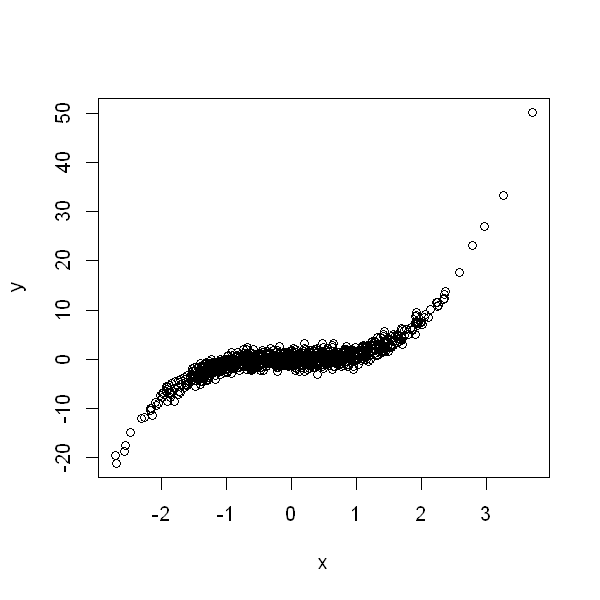

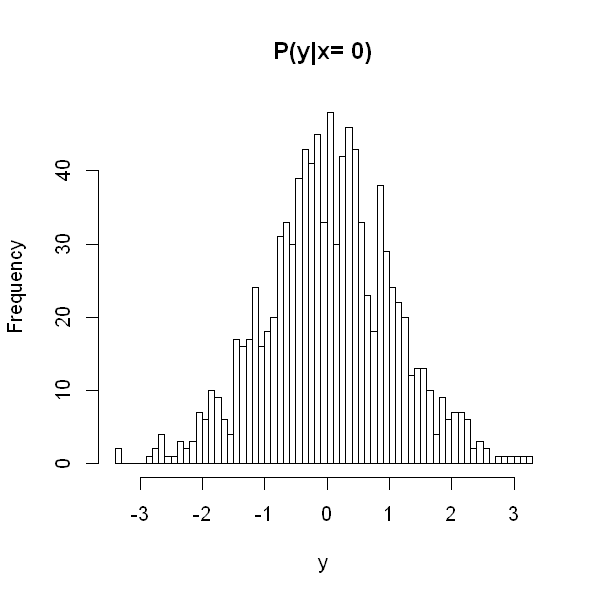

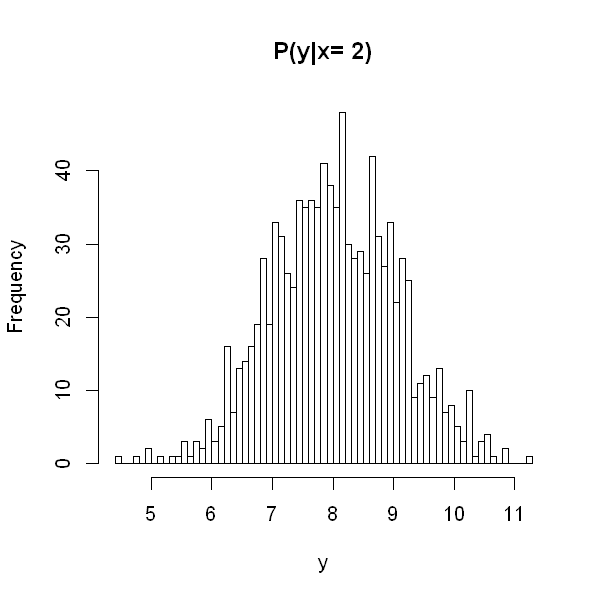

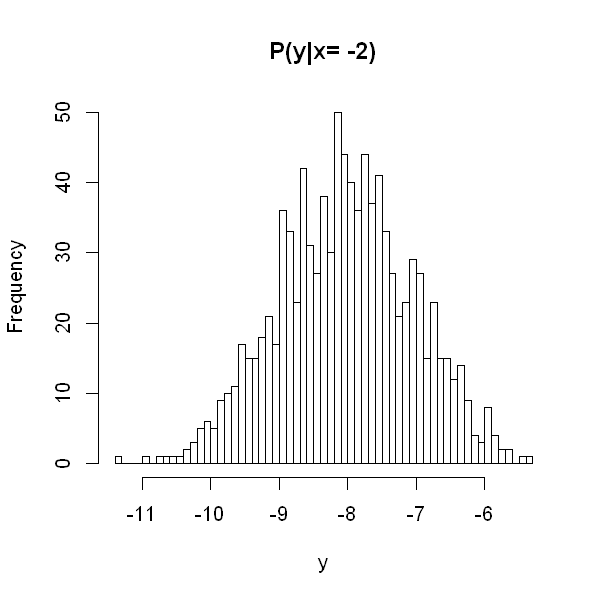

In [4]:
x<- rnorm(1000, 0, 1)
y<- x^3+rnorm(1000, 0 , 1)
options(repr.plot.width= 5, repr.plot.height= 5)
plot(x, y)
x= 0
y<- x^3+rnorm(1000, 0 , 1)
hist(y, breaks =  50, main= "P(y|x= 0)")
x= 2
y<- x^3+rnorm(1000, 0 , 1)
hist(y, breaks =  50, main= "P(y|x= 2)")
x= -2
y<- x^3+rnorm(1000, 0 , 1)
hist(y, breaks =  50, main= "P(y|x= -2)")


for deriving $P(X|Y)$ again I used three different values of y=0, 2, -2.
noting that by using Baysian's rule:
$$P(X|Y=y)= \frac{P(Y=y|X)P(X)}{P(Y=y)}$$
so using that:

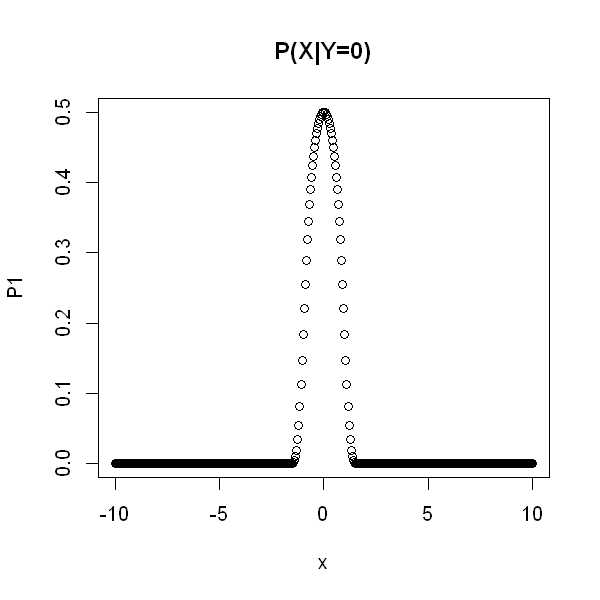

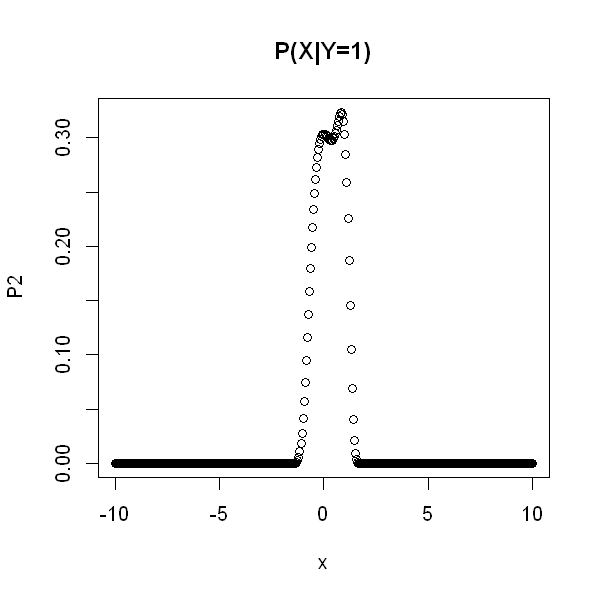

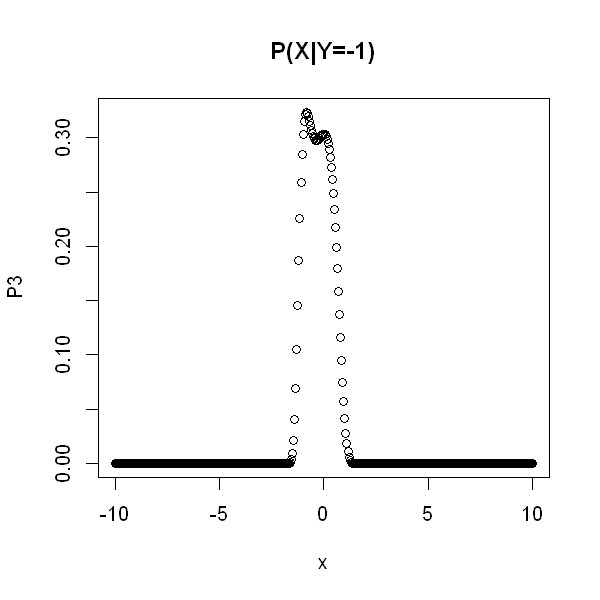

In [5]:
x= seq(-10, 10 , 0.05)
y=0
P1= 1/2*exp(-((y- x^3)^2)/2)*exp(-(x^2)/2)
plot(x, P1, main = "P(X|Y=0)")
y=1
P2= 1/2*exp(-((y- x^3)^2)/2)*exp(-(x^2)/2)
plot(x, P2, main = "P(X|Y=1)")
y=-1
P3= 1/2*exp(-((y- x^3)^2)/2)*exp(-(x^2)/2)
plot(x, P3, main = "P(X|Y=-1)")

as we know the conditional distribution and intervention on the cause have no differences. However, inteventing on the effect(y in this problem) doesn't make any change on X. therefore:
$$P_{X}^{do(Y=y);}(x)= P_{X}(x)$$

## Part1.2:
for "t-distribution" I've used function "rt" and as before:

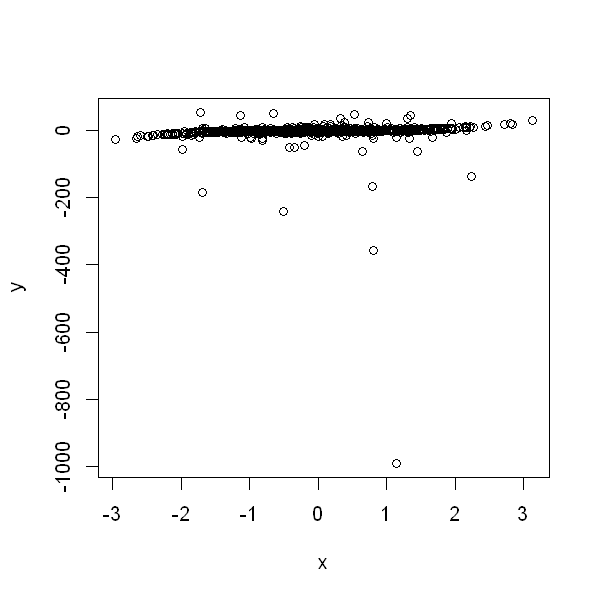

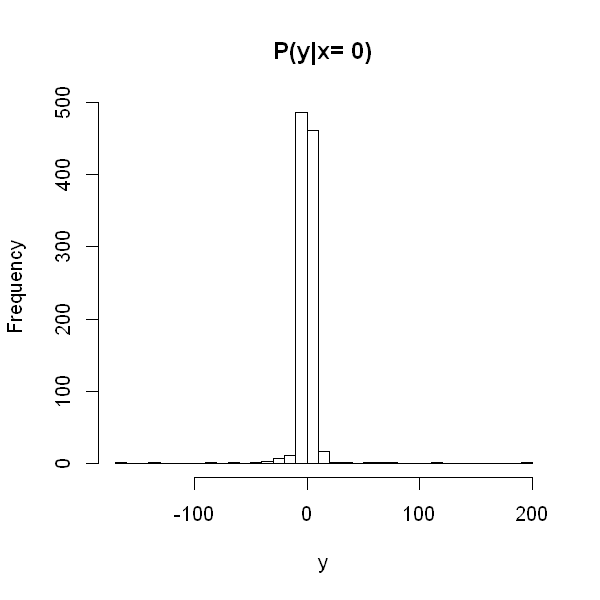

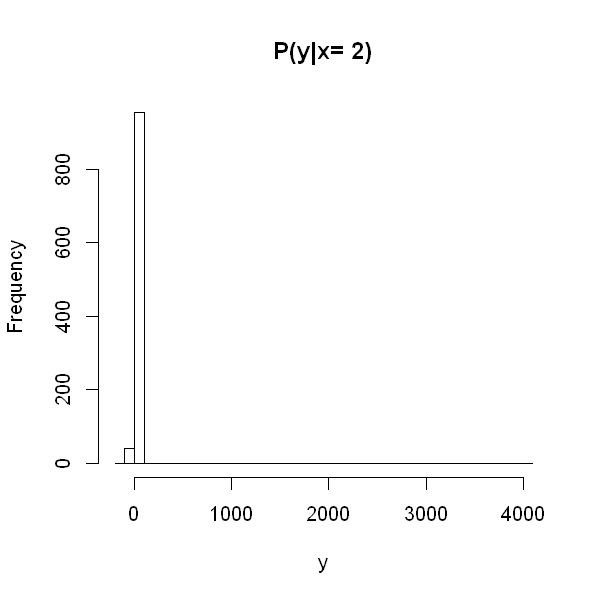

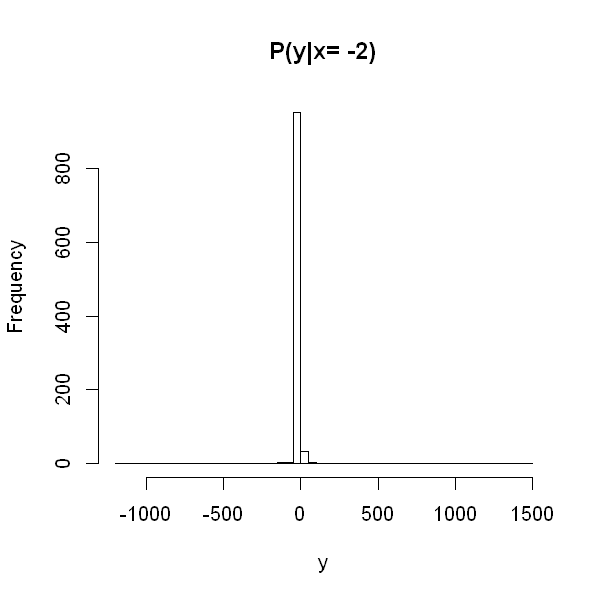

In [7]:
x<- rnorm(1000, 0, 1)
y<- x^3+rt(1000, df= 1)
plot(x, y)
x= 0
y<- x^3+rt(1000, df= 1)
hist(y, breaks =  50, main= "P(y|x= 0)")
x= 2
y<- x^3+rt(1000, df= 1)
hist(y, breaks =  50, main= "P(y|x= 2)")
x= -2
y<- x^3+rt(1000, df= 1)
hist(y, breaks =  50, main= "P(y|x= -2)")

the result is odd because the tail of t-distribution with df=1 does not go to zero as we want to.
for the next part:

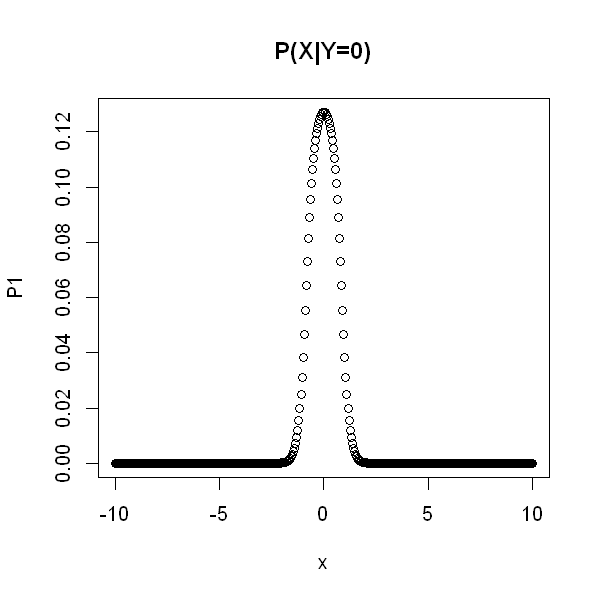

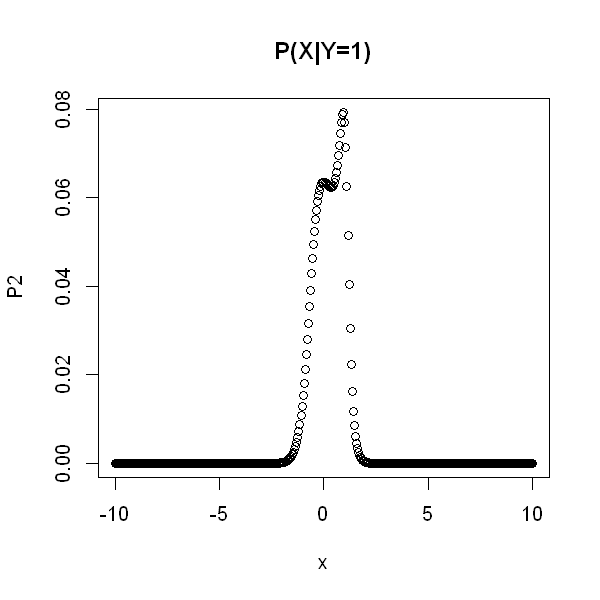

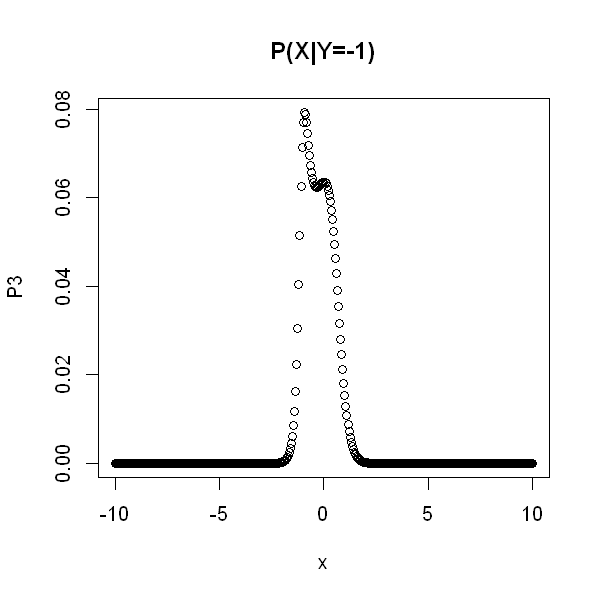

In [8]:
x= seq(-10, 10 , 0.05)
y=0
P1= dt(y- x^3, df= 1)*dnorm(x)
plot(x, P1, main = "P(X|Y=0)")
y=1
P2= dt(y- x^3, df= 1)*dnorm(x)
plot(x, P2, main = "P(X|Y=1)")
y=-1
P3= dt(y- x^3, df= 1)*dnorm(x)
plot(x, P3, main = "P(X|Y=-1)")

## Part 1.3:
this is just as before except df= 5. So I just note the results:

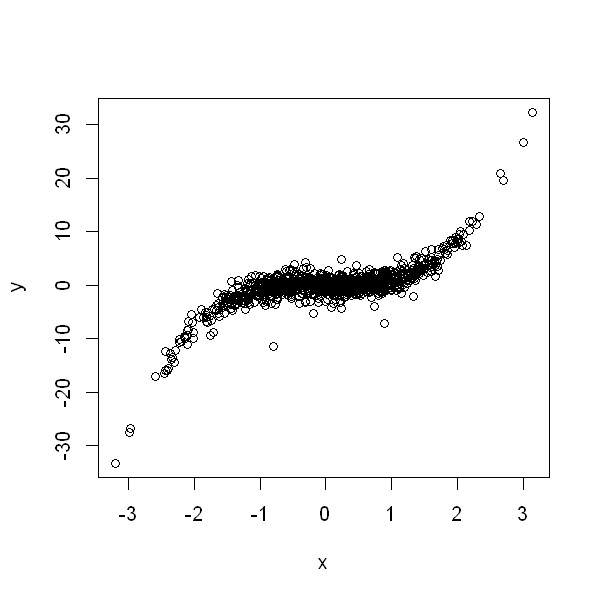

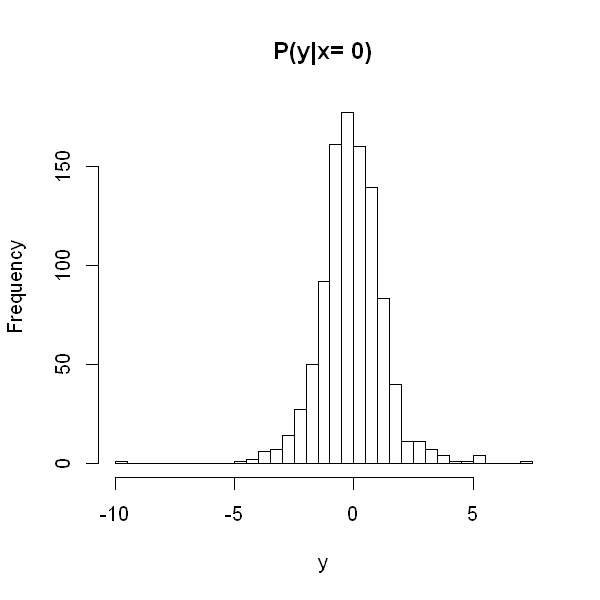

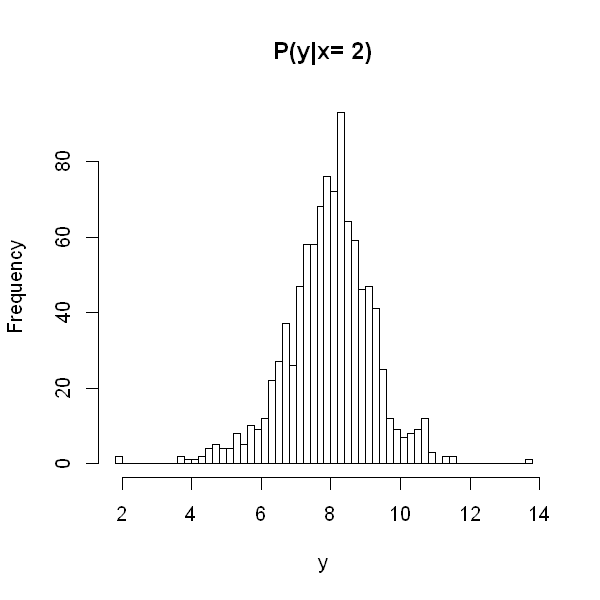

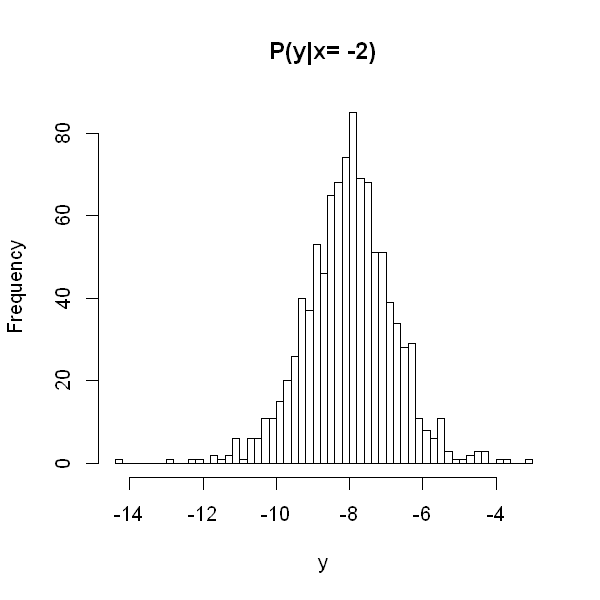

In [10]:
x<- rnorm(1000, 0, 1)
y<- x^3+rt(1000, df= 5)
plot(x, y)
x= 0
y<- x^3+rt(1000, df= 5)
hist(y, breaks =  50, main= "P(y|x= 0)")
x= 2
y<- x^3+rt(1000, df= 5)
hist(y, breaks =  50, main= "P(y|x= 2)")
x= -2
y<- x^3+rt(1000, df= 5)
hist(y, breaks =  50, main= "P(y|x= -2)")

As figures depict above, It's far more concentrated because df= 5. In Part 2 some examples was too far from the mean point.

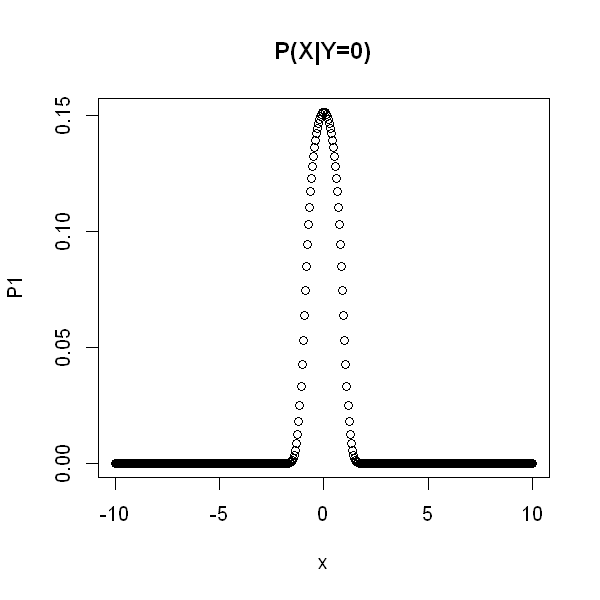

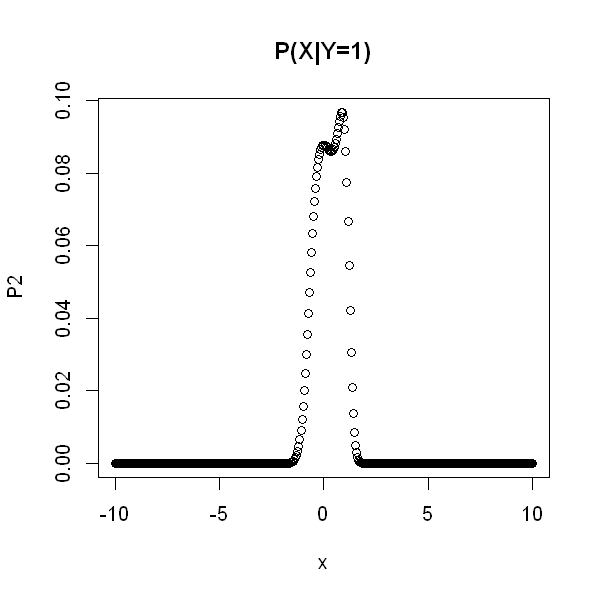

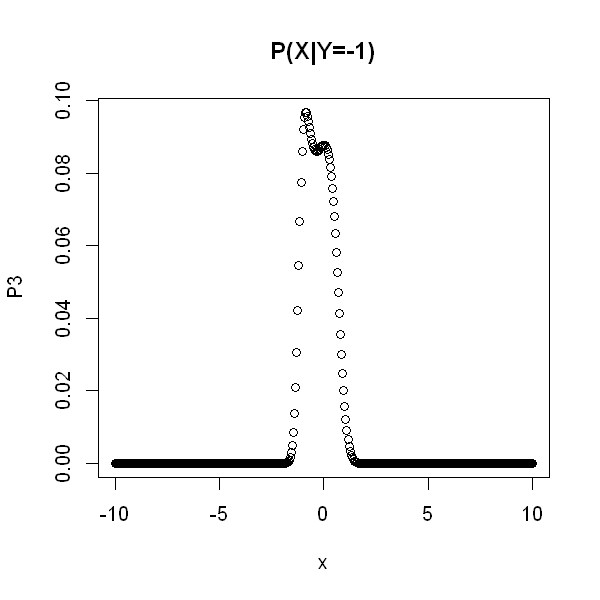

In [11]:
x= seq(-10, 10 , 0.05)
y=0
P1= dt(y- x^3, df= 5)*dnorm(x)
plot(x, P1, main = "P(X|Y=0)")
y=1
P2= dt(y- x^3, df= 5)*dnorm(x)
plot(x, P2, main = "P(X|Y=1)")
y=-1
P3= dt(y- x^3, df= 5)*dnorm(x)
plot(x, P3, main = "P(X|Y=-1)")

the difference between part 2 and 3 is that in part 3 two maximum points are closer.

## Part 1.4:
Again It's like part 2 but df= 20!

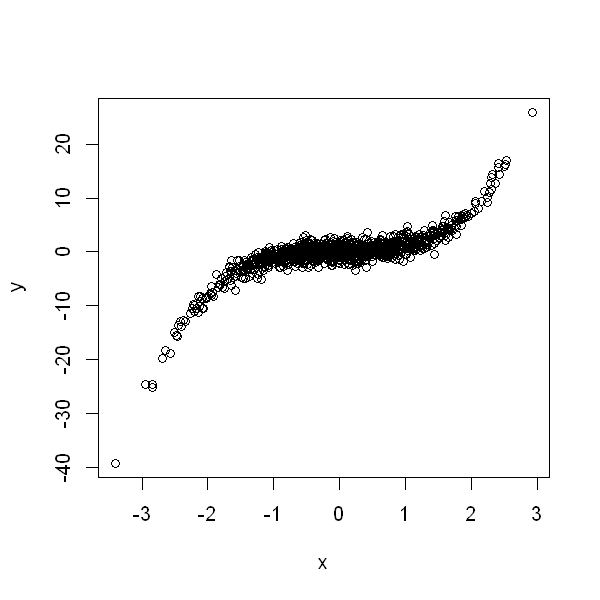

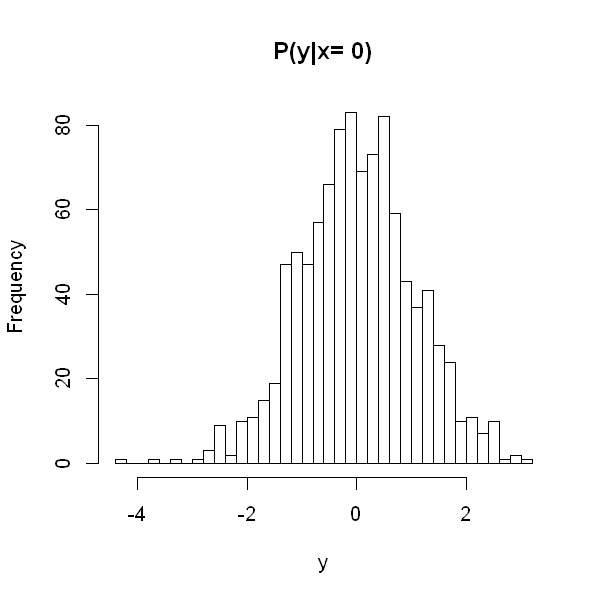

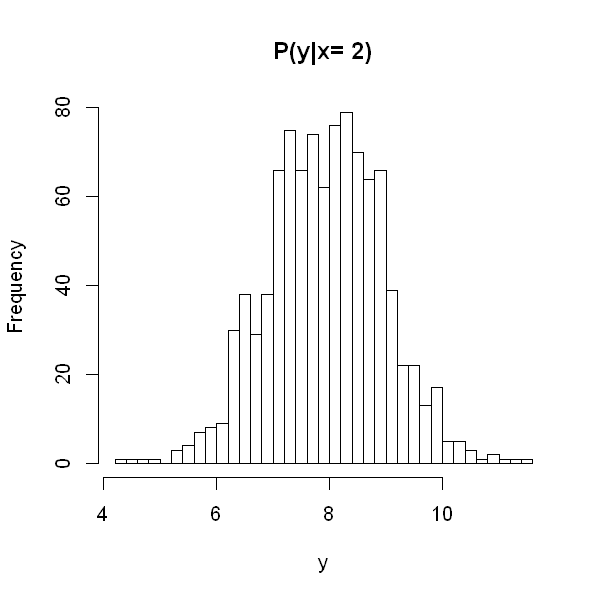

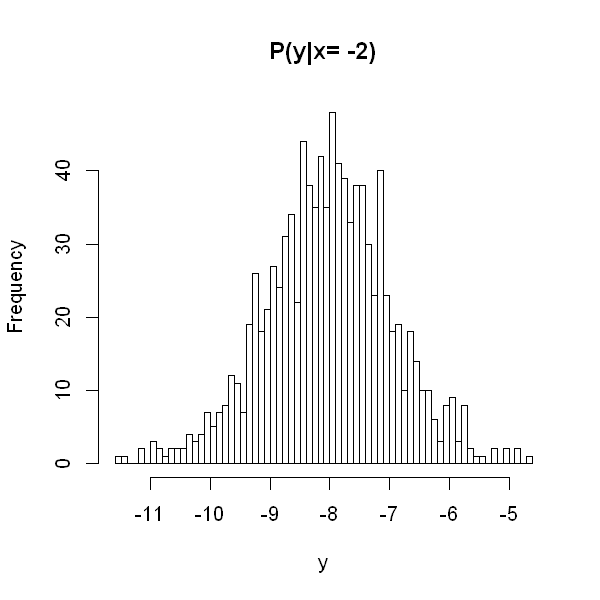

In [12]:
x<- rnorm(1000, 0, 1)
y<- x^3+rt(1000, df= 20)
plot(x, y)
x= 0
y<- x^3+rt(1000, df= 20)
hist(y, breaks =  50, main= "P(y|x= 0)")
x= 2
y<- x^3+rt(1000, df= 20)
hist(y, breaks =  50, main= "P(y|x= 2)")
x= -2
y<- x^3+rt(1000, df= 20)
hist(y, breaks =  50, main= "P(y|x= -2)")

They are more concentrated than part 2.
and for $P(Y|X)$:

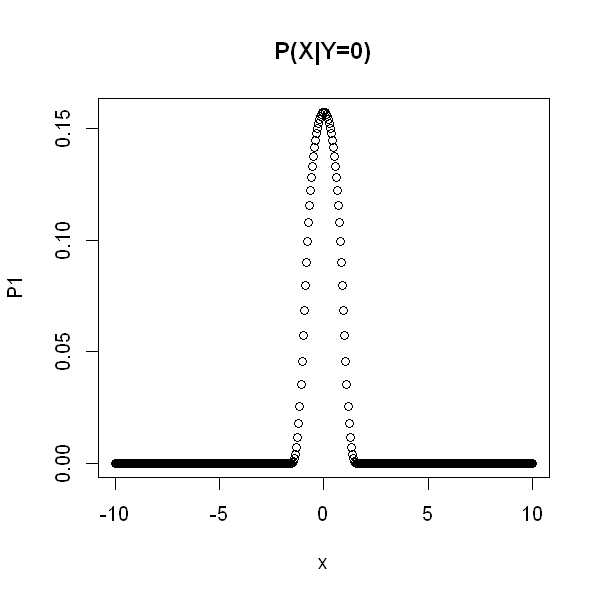

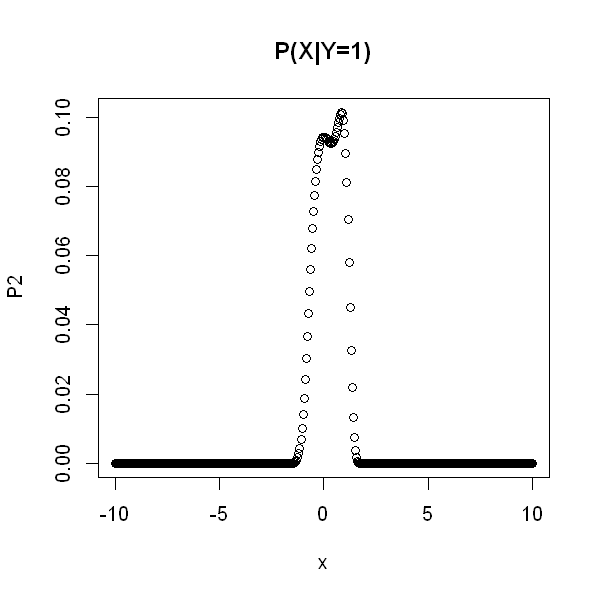

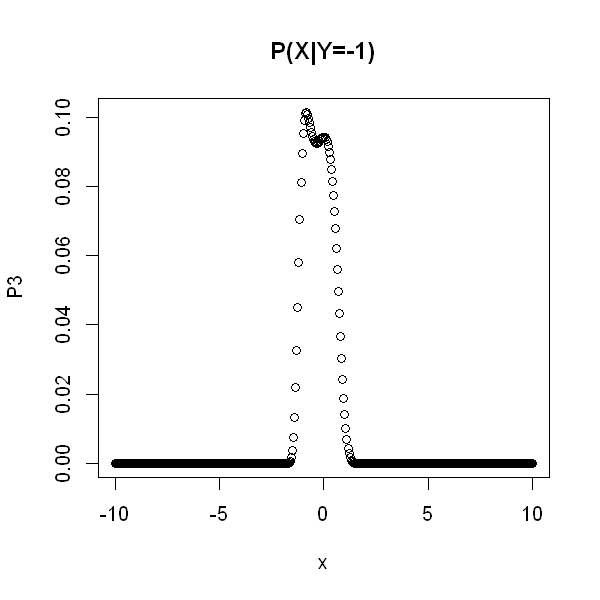

In [13]:
x= seq(-10, 10 , 0.05)
y=0
P1= dt(y- x^3, df= 20)*dnorm(x)
plot(x, P1, main = "P(X|Y=0)")
y=1
P2= dt(y- x^3, df= 20)*dnorm(x)
plot(x, P2, main = "P(X|Y=1)")
y=-1
P3= dt(y- x^3, df= 20)*dnorm(x)
plot(x, P3, main = "P(X|Y=-1)")

note: for part 2, 3 and 4 I deduced as Part 1 that:
$$P_{Y}^{do(X);}(y)= P_{Y|X}(y|x)$$
and:
$$P_{X}^{do(Y);}(x)= P(x)$$
Desicion for the direct of the distribution: observe that for all four distribtion $P(X|Y=0)$ is much more wider than, say $P(X|Y= 20)$.
However this fact is less conspicuous for $P(Y|X)$ and we can conclude that for all four distributions that $x \to y$.



## Problem 2:
At first, I write a function that uses "HSIC" method for checking independency, And for nonlinear regression I used mgcv library as the textbook said. Also it run 10 times and with the mean of 10 p-values it decides on the direction.

In [14]:
library(dHSIC)
library(mgcv)
hsic_predictor <-function(x, y){
  px<- c(1:10)
  py<- c(1:10)
  for (i in c(1:10)){
    nonlin_model1<-  gam(y ~ s(x))
    nonlin_model2<-  gam(x ~ s(y))
    res1<- y- predict(nonlin_model1)
    res2<- x- predict(nonlin_model2)
    p1<- dhsic.test(x,res1)$p.value;
    p2<- dhsic.test(y,res2)$p.value;
    px[i]<- p1
    py[i]<- p2
  }
  
  print(mean(px))
  print(mean(py))
  if (mean(p1)>=mean(p2)){
    print("X causes Y with p value")
    plot(y~x)
  }
  if (mean(p2)>mean(p1)){
    print("Y causes X with p value")
    plot(x~y)
  }
}

Loading required package: nlme
This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.


the result for part1(both $N_x$ and $N_y$ are normal) is good, as we expected:

[1] 0.7396603
[1] 0.001098901
[1] "X causes Y with p value"


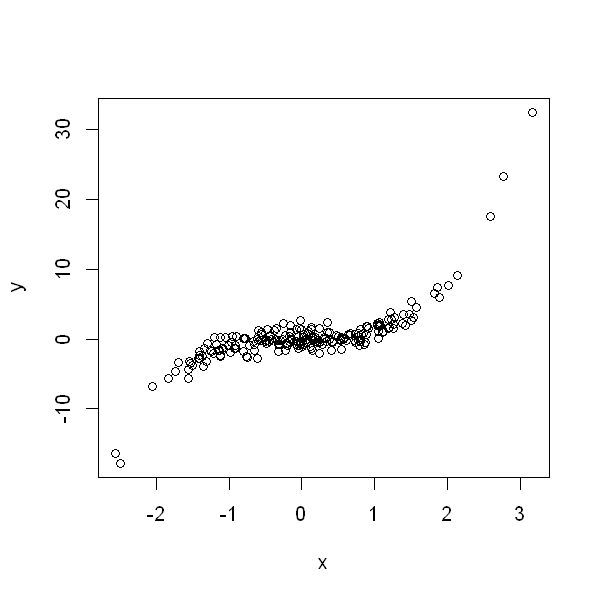

In [15]:
x<- rnorm(200, 0, 1)
y<- x^3+rnorm(200, 0, 1)
hsic_predictor(x,  y)

note that the gap between the mean p-values are large enough to prevent any doubt.
for the second part($N_y \sim t-student(df= 1)$), the result is not good at all! most of the it finds the wrong direction and the p-values are too close.

[1] 0.000999001
[1] 0.05534466
[1] "Y causes X with p value"


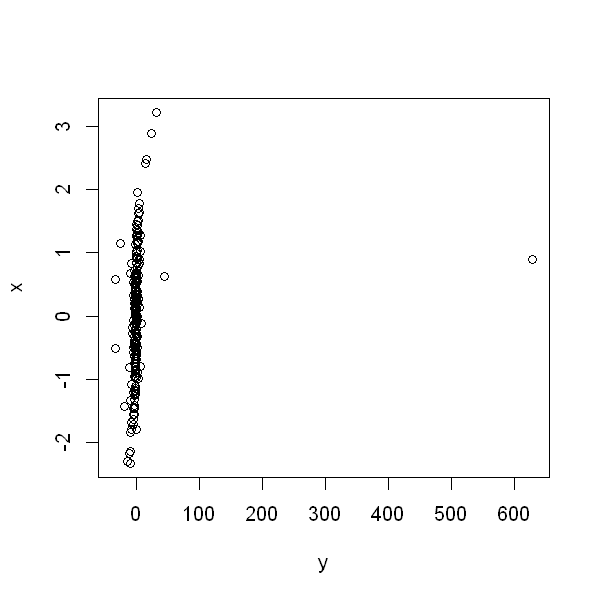

In [17]:
x<- rnorm(200, 0, 1)
y<- x^3+rt(200, df= 1)
hsic_predictor(x,  y)

again in part 3 beacuse the data is more concentrated, the result is acceptable:

[1] 0.6772228
[1] 0.001498501
[1] "X causes Y with p value"


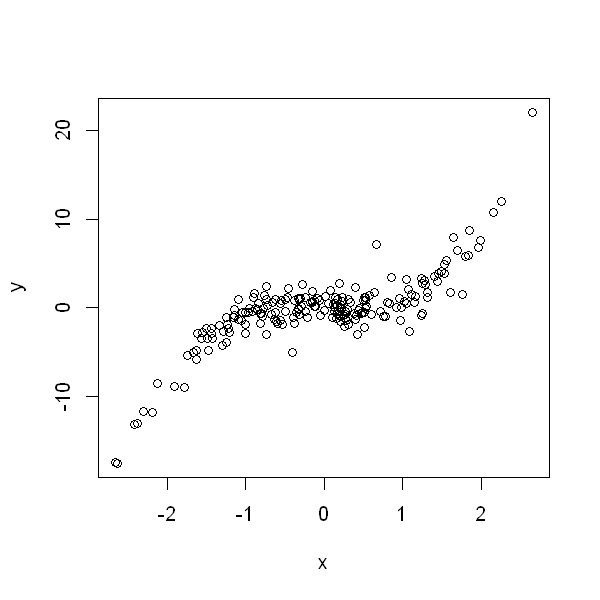

In [18]:
x<- rnorm(200, 0, 1)
y<- x^3+rt(200, df= 5)
hsic_predictor(x,  y)

and the gap between p-values are large.
for the forth part, is the same as third one:

[1] 0.9378621
[1] 0.000999001
[1] "X causes Y with p value"


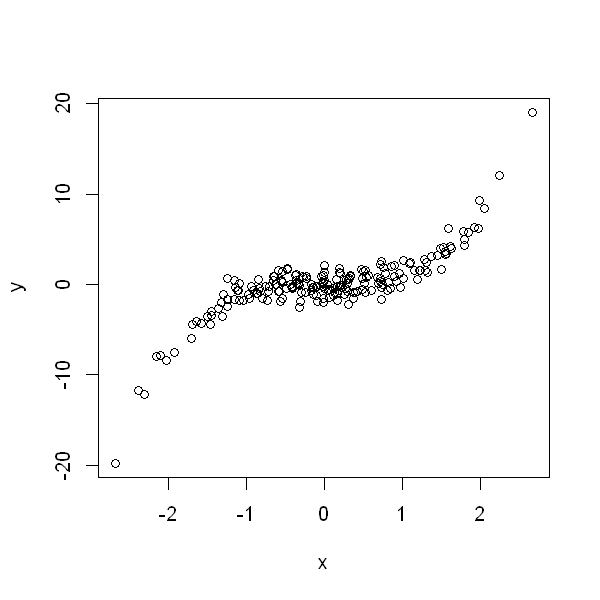

In [19]:
x<- rnorm(200, 0, 1)
y<- x^3+rt(200, df= 20)
hsic_predictor(x,  y)

## Problem 3:
The form data in some files are different. Some of them have more than two variables and also the seperaton type is different in some files. therefore, I just use pair0001 to pair 0040: 

In [21]:
compact_hsic_predictor <-function(x, y){
  px<- c(1:10)
  py<- c(1:10)
  for (i in c(1:10)){
    nonlin_model1<-  gam(y ~ s(x))
    nonlin_model2<-  gam(x ~ s(y))
    res1<- y- predict(nonlin_model1)
    res2<- x- predict(nonlin_model2)
    p1<- dhsic.test(x,res1)$p.value;
    p2<- dhsic.test(y,res2)$p.value;
    px[i]<- p1
    py[i]<- p2
  }
  if (mean(p1)>=mean(p2)){
    result<-1
  }
  if (mean(p2)>mean(p1)){
    result<-0
  }
  result
}


In [25]:
library(stringr)
number_of_predictions=40
right_prediction=0
for (i in 1:number_of_predictions){
  print(paste("Proccessing data number ", i, ":"))
  data_url= paste("https://webdav.tuebingen.mpg.de/cause-effect/pair",
str_pad(i, 4, pad= "0"), ".txt", sep="")
  dat<- read.delim(data_url, header= FALSE, sep=" ")
  x1<- dat[, 1]
  if (length(x1)<300){
    x<- dat[,1]
    y<- dat[,2]
  } else{
    x<- dat[1:300,1]
    y<- dat[1:300,2]
  }
  result= compact_hsic_predictor(x, y)
  if (result==1){
    print(paste("Right prediction for data", i))
    right_prediction<- right_prediction+1
  } else{
    print(paste("Wrong prediction for data", i))
  }
}
print(paste("Total Accuracy:", right_prediction/number_of_predictions))


[1] "Proccessing data number  1 :"
[1] "Right prediction for data 1"
[1] "Proccessing data number  2 :"
[1] "Right prediction for data 2"
[1] "Proccessing data number  3 :"
[1] "Right prediction for data 3"
[1] "Proccessing data number  4 :"
[1] "Right prediction for data 4"
[1] "Proccessing data number  5 :"
[1] "Right prediction for data 5"
[1] "Proccessing data number  6 :"
[1] "Right prediction for data 6"
[1] "Proccessing data number  7 :"
[1] "Right prediction for data 7"
[1] "Proccessing data number  8 :"
[1] "Right prediction for data 8"
[1] "Proccessing data number  9 :"
[1] "Right prediction for data 9"
[1] "Proccessing data number  10 :"
[1] "Right prediction for data 10"
[1] "Proccessing data number  11 :"
[1] "Right prediction for data 11"
[1] "Proccessing data number  12 :"
[1] "Wrong prediction for data 12"
[1] "Proccessing data number  13 :"
[1] "Right prediction for data 13"
[1] "Proccessing data number  14 :"
[1] "Right prediction for data 14"
[1] "Proccessing data nu

the result is rather good. One important reason of error is the data is not so clear to decide. for example consider data0017 that my fuction returns the wrong direction:

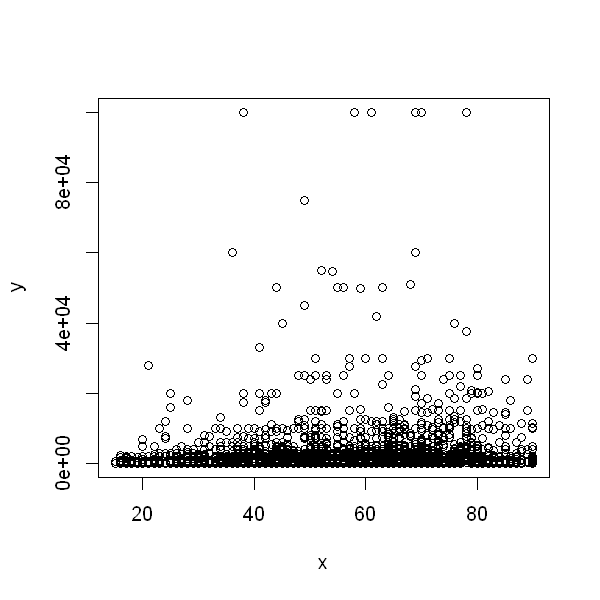

In [26]:
data_url= paste("https://webdav.tuebingen.mpg.de/cause-effect/pair",
str_pad(17, 4, pad= "0"), ".txt", sep="")
dat<- read.delim(data_url, header= FALSE, sep=" ")
x<- dat[ ,1]
y<- dat[ ,2]
plot(x, y)

At least it is unclear for me! 
Cause both $P(X|Y)$ and $P(Y|X)$ are not independent of X and Y.